# ROOT Example

This ROOTbook shows how to create a histogram, fill it and fit it.
Let's start importing the ROOT module, which gives us access to all ROOT classes, and activate the JSROOT visualisation.

In [1]:
import ROOT

Welcome to JupyROOT 6.13/01


Now we will create a histogram specifying its title and axes titles. We'll also subsequently fill it with gaussian random numbers.

In [2]:
h = ROOT.TH1F("myHisto","My Histo;X axis;Y axis",64, -4, 4)
h.FillRandom("gaus")

We now setup our fit. ROOT provides a set of predefined functions, among which the Gaussian. You can have a look to the TF1 class documentation to learn more about how functions are implemented in ROOT. For example you will see that you can define functional forms with strings, lambda functions or other kind of functors.

We specify the option "S" to extract the information relative to the fit in a separate object: we will inspect it later.

In [3]:
c1 = ROOT.TCanvas()
fitResultPtr = h.Fit("gaus","S")

 FCN=47.4997 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=8.44224e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46469e+02   4.31494e+00   1.19094e-02  -2.44811e-05
   2  Mean         1.04782e-02   1.43576e-02   4.87656e-05  -6.34020e-03
   3  Sigma        1.00315e+00   1.03818e-02   9.45504e-06  -2.70309e-02


You can see above the output of the fit, which converged. The value, uncertainty and other useful quantities are reported for each parameter.

If more detail is needed, other information can be extracted, for example the final chi-square value or the number of free parameters:

In [4]:
chi2_nparams = (fitResultPtr.Chi2(), fitResultPtr.NFreeParameters()) 
print "The final Chi2 value was %.2f and the number of free parameters was %d" %chi2_nparams

The final Chi2 value was 47.50 and the number of free parameters was 3


The final Chi2 value was 47.50 and the number of free parameters was 3
So far so good. Now we can draw our fitted histogram. We have two options.

Create a new, fresh canvas and draw the histogram in it.
Find back the canvas which was created (see the message above!) and draw it. The fitted function is now associated of the histogram: no special operation is needed.
Let's tackle this task following option 2. ROOT keeps track of all canvases and it is trivial to retrieve any of them by name.

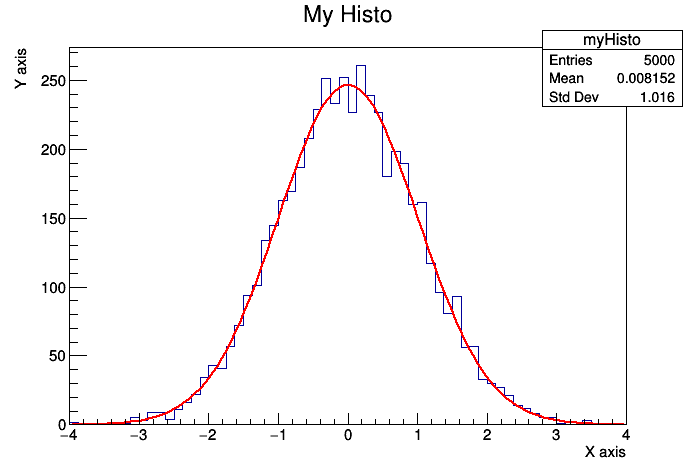

In [5]:
c1 = ROOT.gROOT.GetListOfCanvases().FindObject("c1")
c1.Draw()